Import the librarires

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense


Load the Data

In [18]:
df = pd.read_csv('/content/drive/MyDrive/DOGE-USD.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0


Convert The Date Column to Datetime and set it as index
*italicised text*



In [19]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

Resample the data to daily frequency

In [20]:
df = df.resample('D').mean()

Create a new column with the closing price

In [21]:
df['Close'] = df['Close'].astype(float)

Scale the data using min-max scaler



In [22]:
scaler = MinMaxScaler(feature_range=(0, 1))
df['Close'] = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

Split the Data into Training and testing sets

In [23]:
train_size = int(0.8 * len(df))
train_data, test_data = df[0:train_size], df[train_size:len(df)]

Create The LSTM Model

In [24]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(None, 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

Reshape The Data For LSTM Model

In [25]:
train_data_reshaped = train_data.values.reshape(-1, 1, 1)
test_data_reshaped = test_data.values.reshape(-1, 1, 1)

Train The Model

In [27]:
model.fit(train_data_reshaped, train_data_reshaped, epochs=50, batch_size=32, verbose=2)

Epoch 1/50
264/264 - 4s - loss: 2715419062019555328.0000 - 4s/epoch - 16ms/step
Epoch 2/50
264/264 - 1s - loss: 2715418512263741440.0000 - 783ms/epoch - 3ms/step
Epoch 3/50
264/264 - 1s - loss: 2715419886653276160.0000 - 758ms/epoch - 3ms/step
Epoch 4/50
264/264 - 1s - loss: 2715418787141648384.0000 - 776ms/epoch - 3ms/step
Epoch 5/50
264/264 - 1s - loss: 2715418787141648384.0000 - 771ms/epoch - 3ms/step
Epoch 6/50
264/264 - 1s - loss: 2715418237385834496.0000 - 773ms/epoch - 3ms/step
Epoch 7/50
264/264 - 1s - loss: 2715419062019555328.0000 - 791ms/epoch - 3ms/step
Epoch 8/50
264/264 - 1s - loss: 2715419062019555328.0000 - 786ms/epoch - 3ms/step
Epoch 9/50
264/264 - 1s - loss: 2715419886653276160.0000 - 1s/epoch - 4ms/step
Epoch 10/50
264/264 - 1s - loss: 2715418512263741440.0000 - 1s/epoch - 5ms/step
Epoch 11/50
264/264 - 1s - loss: 2715417687630020608.0000 - 1s/epoch - 4ms/step
Epoch 12/50
264/264 - 1s - loss: 2715419886653276160.0000 - 1s/epoch - 5ms/step
Epoch 13/50
264/264 - 1s - 

Make Predictions on the Test Data

In [28]:
predictions = model.predict(test_data_reshaped)

67/67 [==============================] - 1s 2ms/step


Inverse the scaling

In [29]:
predictions = scaler.inverse_transform(predictions)

Evaluate The Model

In [30]:
mse = model.evaluate(test_data_reshaped, predictions)
print(f'MSE: {mse}')

67/67 [==============================] - 1s 2ms/step - loss: nan  
MSE: nan


Use the Model To Predicte the Future Prices

In [31]:
future_days = 30
future_data = np.array([df['Close'].iloc[-1]] * future_days).reshape(-1, 1, 1)
future_predictions = model.predict(future_data)
future_predictions = scaler.inverse_transform(future_predictions)

1/1 [==============================] - 0s 40ms/step


Plot the results

In [32]:
import matplotlib.pyplot as plt

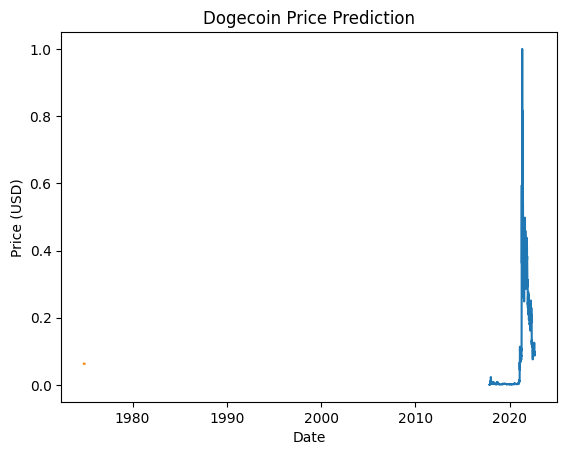

In [33]:
plt.plot(df.index, df['Close'])
plt.plot(np.arange(len(df), len(df) + future_days), future_predictions)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Dogecoin Price Prediction')
plt.show()

In [34]:

model.save('doge_predictor_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
